# Plot
Convenience class for data visualization.

In [1]:
%autosave 0

from tools import *
from plot import Plot

Autosave disabled


## build a Plot
First argument is a matplotlib *style*.<br>
Keyword arguments become defaults for plots.

In [2]:
plot = Plot('bmh', figsize=(6, 4))
plot.params

{'axes': {'frame_on': False},
 'figure': {'clear': True,
  'dpi': 100,
  'edgecolor': None,
  'facecolor': None,
  'figsize': (6, 4),
  'frameon': False,
  'tight_layout': True},
 'legend': {'bbox_to_anchor': (1.05, 1),
  'borderaxespad': 0.0,
  'loc': 'upper left'}}

## load example data

In [3]:
data = nycenergy()
data = data[data.sum().nlargest(6).index]
afew(data)

,gas,nuclear,hydro,net_imports,coal,petroleum
year,,,,,,
2008-01-01,44389.0,43209,27501.0,23899.0,19154.0,3745.0
2006-01-01,42460.0,42224,28422.0,18569.0,20968.0,6778.0
2012-01-01,60198.0,40775,25303.0,26180.0,4551.0,580.0
2012-01-01,60198.0,40775,25303.0,26180.0,4551.0,580.0
2007-01-01,46031.0,42453,25557.0,20708.0,21406.0,8195.0


In [4]:
color = 'yellow green blue grey black red'.split()

## area

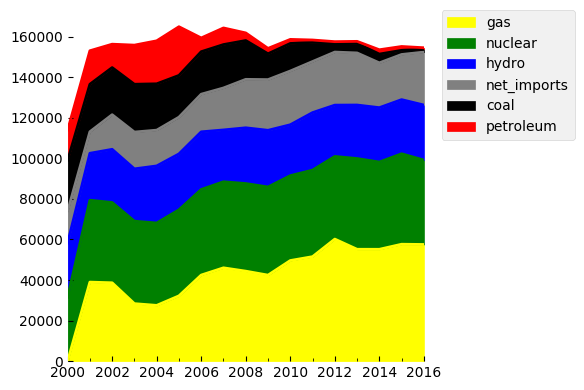

In [5]:
plot.area(data, color=color)

## bar, barh

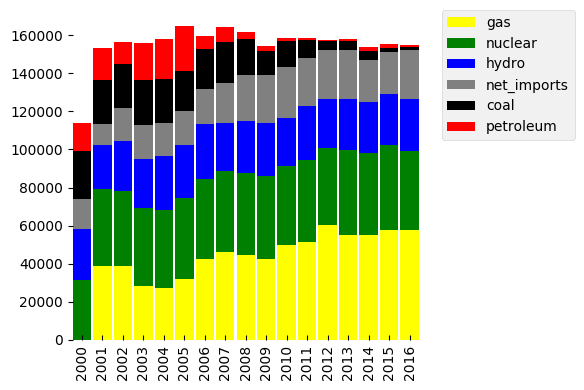

In [6]:
plot.bar(data.set_index(data.index.year), color=color)

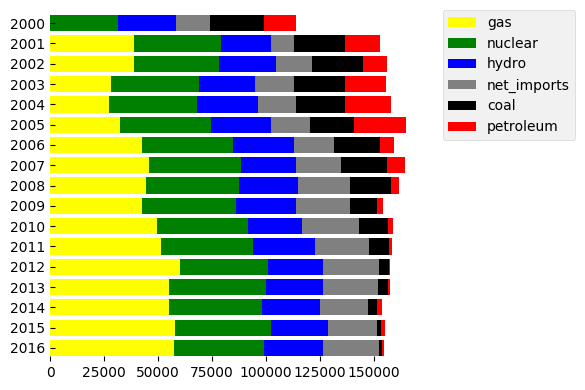

In [7]:
plot.barh(data.set_index(data.index.year), color=color)

## box, boxh

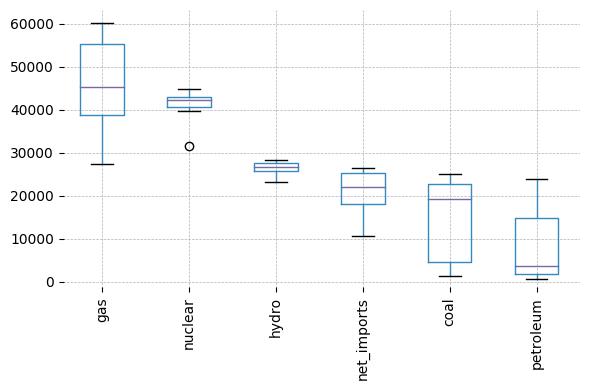

In [8]:
plot.box(data)

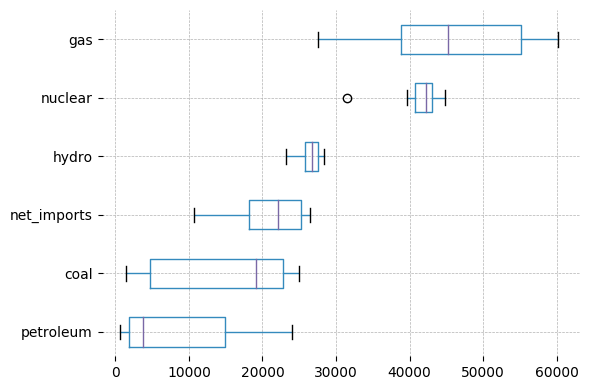

In [9]:
plot.boxh(data)

## density

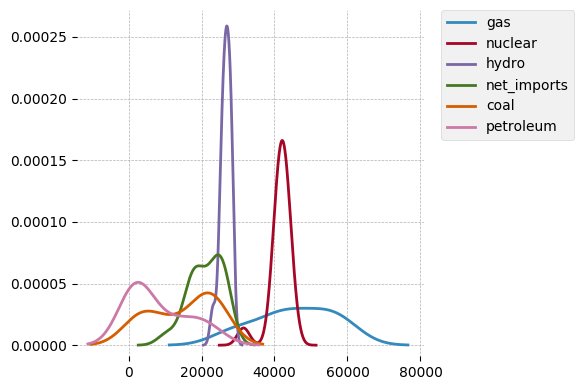

In [10]:
plot.density(data)

## heat

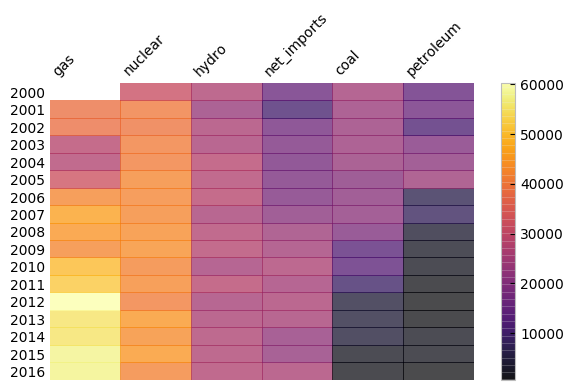

In [11]:
plot.heat(data.set_index(data.index.year), colorbar=True)

## hist

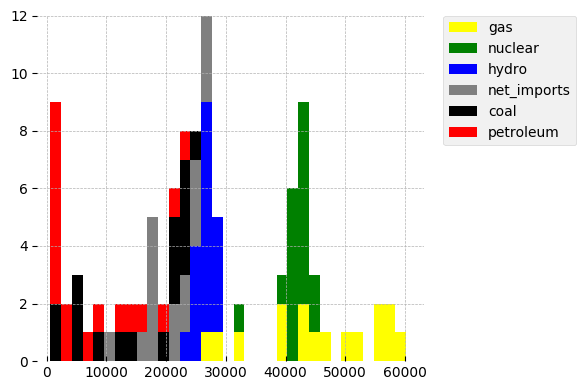

In [12]:
plot.hist(data, color=color)

## line

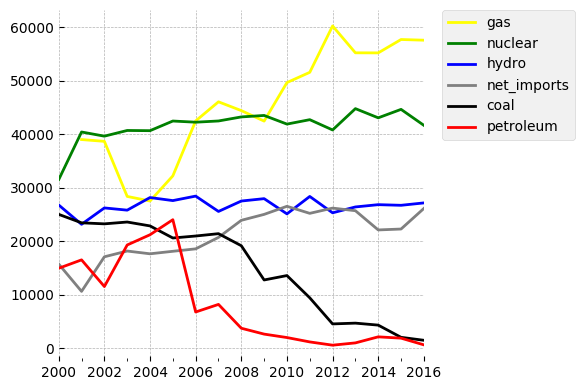

In [13]:
plot.line(data, color=color)

## scatter

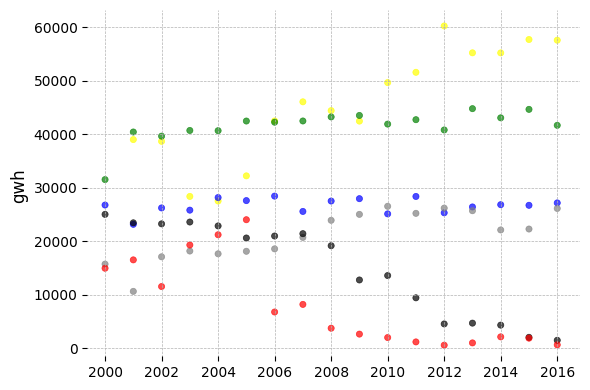

In [14]:
points = data.stack().reset_index()
points.columns = 'year source gwh'.split()
points['year'] = points['year'].dt.year
points['color'] = points['source'].map(dict(zip(data.columns, color)))
points = points['year gwh color'.split()]

plot.scatter(points, ylabel='gwh')

## help

In [15]:
help(Plot)

Help on class Plot in module plot:

class Plot(builtins.object)
 |  Plot(style='bmh', **kwargs)
 |  
 |  Plot maker for pandas.DataFrame or .Series inputs.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, data, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, style='bmh', **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  area(self, data, **kwargs)
 |      AxesSubplot: Area plot for each column.
 |  
 |  axes(self)
 |  
 |  bar(self, data, **kwargs)
 |      AxesSubplot: Bar plot for each column.
 |  
 |  barh(self, data, **kwargs)
 |      AxesSubplot: Horizontal bar plot for each column.
 |  
 |  box(self, data, **kwargs)
 |      AxesSubplot: Box plot for each column.
 |  
 |  boxh(self, data, **kwargs)
 |      AxesSubplot: Horizontal box plot for each column.
 |  
 |  density(self, data, **kwargs)
 |      AxesSubplot: Probability density estimate for each column.
 |  
 |  